# Demo: Convolutional neural network (CNN) using Tensorflow


This tutoriel is based on this one : https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import colors
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, AvgPool2D, Flatten, Dense, Dropout, UpSampling2D, Reshape
from tensorflow.keras.models import Sequential, Model

tf.__version__

2025-02-19 08:47:54.059869: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-19 08:47:54.301284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739951274.382686    5849 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739951274.406198    5849 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 08:47:54.628436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

'2.18.0'

## I. Presenting the API

In [3]:
test_in_img1 = []

for i in range(6): # rows
    row = []
    test_in_img1.append(row)
    for j in range(5): # columns
        nb = i * 5 + j
        row.append([nb, nb + 100])

test_in = np.array([test_in_img1])

print(test_in.shape)

test_in

(1, 6, 5, 2)


array([[[[  0, 100],
         [  1, 101],
         [  2, 102],
         [  3, 103],
         [  4, 104]],

        [[  5, 105],
         [  6, 106],
         [  7, 107],
         [  8, 108],
         [  9, 109]],

        [[ 10, 110],
         [ 11, 111],
         [ 12, 112],
         [ 13, 113],
         [ 14, 114]],

        [[ 15, 115],
         [ 16, 116],
         [ 17, 117],
         [ 18, 118],
         [ 19, 119]],

        [[ 20, 120],
         [ 21, 121],
         [ 22, 122],
         [ 23, 123],
         [ 24, 124]],

        [[ 25, 125],
         [ 26, 126],
         [ 27, 127],
         [ 28, 128],
         [ 29, 129]]]])

### I.1. Convolution

In [4]:
conv2d_model = Sequential([
    Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), activation='relu', name='cnv') # padding="same"
], name='conv2d_exp')

# parameters numer is [3 (H) * 3 (W) * 2 (d) + 1 ] * 4 (k) = 76
conv2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

conv2d_model.summary()

2025-02-19 08:47:56.536632: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "conv2d_exp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cnv (Conv2D)                    │ (None, 4, 3, 4)        │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
test_out = conv2d_model.predict(test_in)

print(test_out.shape)

# H' = (H - Hf + 2P)/S + 1 = (6 - 3 + (2 * 0))/1 + 1 = 4
# W' = (W - Wf + 2P)/S + 1 = (5 - 3 + (2 * 0))/1 + 1 = 3
# shape = (M, H', W', k) = (1, 4, 3, 4)
test_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
(1, 4, 3, 4)


array([[[[ -0.      ,  38.63559 , 127.33129 ,  -0.      ],
         [ -0.      ,  38.465847, 128.17088 ,  -0.      ],
         [ -0.      ,  38.296093, 129.0105  ,  -0.      ]],

        [[ -0.      ,  37.786842, 131.5293  ,  -0.      ],
         [ -0.      ,  37.61709 , 132.3689  ,  -0.      ],
         [ -0.      ,  37.447346, 133.2085  ,  -0.      ]],

        [[ -0.      ,  36.938084, 135.7273  ,  -0.      ],
         [ -0.      ,  36.768333, 136.5669  ,  -0.      ],
         [ -0.      ,  36.598587, 137.40652 ,  -0.      ]],

        [[ -0.      ,  36.08933 , 139.92531 ,  -0.      ],
         [ -0.      ,  35.91958 , 140.7649  ,  -0.      ],
         [ -0.      ,  35.74982 , 141.60452 ,  -0.      ]]]],
      dtype=float32)

### I.2. Max Pool

In [6]:
maxpool2d_model = Sequential([
    MaxPool2D(pool_size=(3, 3), strides=(1, 1), name='mxp') # padding="same"
], name='maxpool2d_exp')

# parameters numer is zero
maxpool2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

maxpool2d_model.summary()

Model: "maxpool2d_exp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mxp (MaxPooling2D)              │ (None, 4, 3, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
test_out = maxpool2d_model.predict(test_in)

print(test_out.shape)

# H' = (H - Hf + 2P)/S + 1 = (6 - 3 + (2 * 0))/1 + 1 = 4
# W' = (W - Wf + 2P)/S + 1 = (5 - 3 + (2 * 0))/1 + 1 = 3
# shape = (M, H', W', k) = (1, 4, 3, 4)
test_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
(1, 4, 3, 2)


array([[[[ 12., 112.],
         [ 13., 113.],
         [ 14., 114.]],

        [[ 17., 117.],
         [ 18., 118.],
         [ 19., 119.]],

        [[ 22., 122.],
         [ 23., 123.],
         [ 24., 124.]],

        [[ 27., 127.],
         [ 28., 128.],
         [ 29., 129.]]]], dtype=float32)

### I.3. Average Pool

In [8]:
avgpool2d_model = Sequential([
    AvgPool2D(pool_size=(3, 3), strides=(1, 1), name='avgp') # padding="same"
], name='avgpool2d_exp')

# parameters numer is zero
avgpool2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

avgpool2d_model.summary()

Model: "avgpool2d_exp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ avgp (AveragePooling2D)         │ (None, 4, 3, 2)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
test_out = avgpool2d_model.predict(test_in)

print(test_out.shape)

# H' = (H - Hf + 2P)/S + 1 = (6 - 3 + (2 * 0))/1 + 1 = 4
# W' = (W - Wf + 2P)/S + 1 = (5 - 3 + (2 * 0))/1 + 1 = 3
# shape = (M, H', W', k) = (1, 4, 3, 4)
test_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
(1, 4, 3, 2)


array([[[[  6., 106.],
         [  7., 107.],
         [  8., 108.]],

        [[ 11., 111.],
         [ 12., 112.],
         [ 13., 113.]],

        [[ 16., 116.],
         [ 17., 117.],
         [ 18., 118.]],

        [[ 21., 121.],
         [ 22., 122.],
         [ 23., 123.]]]], dtype=float32)

### I.4. Up Sampling

"interpolation" parameter: A string, one of "area", "bicubic", "bilinear", "gaussian", "lanczos3", "lanczos5", "mitchellcubic", "nearest".
Up to version 2.8, only "bilinear" and "nearest" are allowed.

In [10]:
upsamp2d_model = Sequential([
    UpSampling2D(size=(2, 2), interpolation='nearest', name='upsmp') # padding="same"
], name='upsamp2d_exp')

# parameters numer is zero
upsamp2d_model.build(input_shape=(None, 6, 5, 2)) # images 6(H)X5(W)X2(d)

upsamp2d_model.summary()

Model: "upsamp2d_exp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ upsmp (UpSampling2D)            │ (None, 12, 10, 2)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
test_out = upsamp2d_model.predict(test_in)

# W' = W * Wf = 5 * 2 = 10
# H' = H * Hf = 6 * 2 = 12
print(test_out.shape)

test_out

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(1, 12, 10, 2)


array([[[[  0., 100.],
         [  0., 100.],
         [  1., 101.],
         [  1., 101.],
         [  2., 102.],
         [  2., 102.],
         [  3., 103.],
         [  3., 103.],
         [  4., 104.],
         [  4., 104.]],

        [[  0., 100.],
         [  0., 100.],
         [  1., 101.],
         [  1., 101.],
         [  2., 102.],
         [  2., 102.],
         [  3., 103.],
         [  3., 103.],
         [  4., 104.],
         [  4., 104.]],

        [[  5., 105.],
         [  5., 105.],
         [  6., 106.],
         [  6., 106.],
         [  7., 107.],
         [  7., 107.],
         [  8., 108.],
         [  8., 108.],
         [  9., 109.],
         [  9., 109.]],

        [[  5., 105.],
         [  5., 105.],
         [  6., 106.],
         [  6., 106.],
         [  7., 107.],
         [  7., 107.],
         [  8., 108.],
         [  8., 108.],
         [  9., 109.],
         [  9., 109.]],

        [[ 10., 110.],
         [ 10., 110.],
         [ 11., 111.],
   

## II. CNN classifier

### II.1. dataset

In [12]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train1 = x_train.reshape([-1, 784])
x_test1 = x_test.reshape([-1, 784])

y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

x_train.shape, x_test.shape, x_train1.shape, x_test1.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000, 784), (10000, 784))

### II.2. FFNN classifier

In [13]:
tf.random.set_seed(0)
ffnn_cls = Sequential(name='FFNN_classifier')
ffnn_cls.add(Dense(30, activation="relu", input_shape=(784,), name='FFNN_cls_h'))
ffnn_cls.add(Dropout(0.2))# this was added to reduce overtraining 
ffnn_cls.add(Dense(10, activation="softmax", name='FFNN_cls_out'))

ffnn_cls.summary()

/opt/env/ml/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "FFNN_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FFNN_cls_h (Dense)              │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FFNN_cls_out (Dense)            │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,860 (93.20 KB)

 Trainable params: 23,860 (93.20 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
ffnn_cls.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

print("Training FFNN classifier ...")
results = ffnn_cls.fit(x_train1, y_train_onehot, epochs=50, validation_data=(x_test1, y_test_onehot))


Training FFNN classifier ...
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 936us/step - accuracy: 0.7824 - loss: 0.7291 - val_accuracy: 0.9319 - val_loss: 0.2304
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9110 - loss: 0.3027 - val_accuracy: 0.9454 - val_loss: 0.1817
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.9239 - loss: 0.2586 - val_accuracy: 0.9515 - val_loss: 0.1644
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.9324 - loss: 0.2290 - val_accuracy: 0.9533 - val_loss: 0.1537
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.9348 - loss: 0.2170 - val_accuracy: 0.9562 - val_loss: 0.1498
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9369 - loss: 0.2068 - val_accuracy: 0.9592 - val_loss: 0.1407
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9406 - loss: 0.1956 - val_accuracy: 0.9592 - val_loss: 0.1395
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 85

### II.3. CNN classifier

In [15]:
cnn_cls = Sequential(name='CNN_classifier')
cnn_cls.add(Conv2D(5, (4, 4), activation='relu', input_shape=(28, 28, 1), name='CNN_cls_conv1'))
cnn_cls.add(AvgPool2D((5, 5), name='CNN_cls_avgpool1'))
cnn_cls.add(Conv2D(2, (2, 2), activation='relu', name='CNN_cls_conv2'))
cnn_cls.add(Flatten())
cnn_cls.add(Dense(10, activation="softmax", name='CNN_cls_out'))


cnn_cls.summary()

/opt/env/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CNN_cls_conv1 (Conv2D)          │ (None, 25, 25, 5)      │            85 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_cls_avgpool1                │ (None, 5, 5, 5)        │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_cls_conv2 (Conv2D)          │ (None, 4, 4, 2)        │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_cls_out (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
cnn_cls.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

print("Training CNN classifier ...")
results2 = cnn_cls.fit(x_train, y_train_onehot, epochs=50, validation_data=(x_test, y_test_onehot))


Training CNN classifier ...
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5761 - loss: 1.2569 - val_accuracy: 0.8658 - val_loss: 0.4435
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8614 - loss: 0.4532 - val_accuracy: 0.8860 - val_loss: 0.3757
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8797 - loss: 0.3977 - val_accuracy: 0.8971 - val_loss: 0.3394
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8906 - loss: 0.3654 - val_accuracy: 0.9061 - val_loss: 0.3131
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8985 - loss: 0.3411 - val_accuracy: 0.9125 - val_loss: 0.2915
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9043 - loss: 0.3208 - val_accuracy: 0.9186 - val_loss: 0.2727
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9094 - loss: 0.3027 - val_accuracy: 0.9247 - val_loss: 0.2552
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accura

### II.4. FFNN vs. CNN classifier

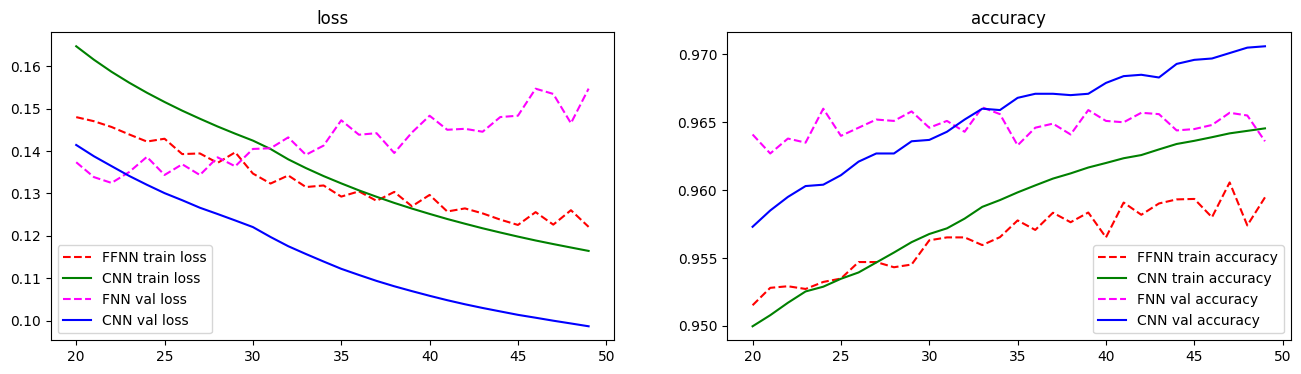

In [17]:
epochs = range(50)
start = 20
ffnn_hist = results.history
cnn_hist = results2.history

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

ax[0].plot(epochs[start:], ffnn_hist["loss"][start:], color="red", linestyle="--", label="FFNN train loss")
ax[0].plot(epochs[start:], cnn_hist["loss"][start:], color="green", label="CNN train loss")
ax[0].plot(epochs[start:], ffnn_hist["val_loss"][start:], color="magenta", linestyle="--", label="FNN val loss")
ax[0].plot(epochs[start:], cnn_hist["val_loss"][start:], color="blue", label="CNN val loss")
ax[0].set_title("loss")
ax[0].legend()

ax[1].plot(epochs[start:], ffnn_hist["accuracy"][start:], color="red", linestyle="--", label="FFNN train accuracy")
ax[1].plot(epochs[start:], cnn_hist["accuracy"][start:], color="green", label="CNN train accuracy")
ax[1].plot(epochs[start:], ffnn_hist["val_accuracy"][start:], color="magenta", linestyle="--", label="FNN val accuracy")
ax[1].plot(epochs[start:], cnn_hist["val_accuracy"][start:], color="blue", label="CNN val accuracy")
ax[1].set_title("accuracy")
ax[1].legend()

plt.show()

## III. CNN auto-encoder

In [18]:
# Encoder 
# ========

# the input of the encoder has a shape of (H X W X c) elements
inputs_cnnae = Input(shape=(28, 28, 1), name='CNN_encoder_in')
# Apply a conv2d with paddings to preserve the same image dimension with 3 channels
h = Conv2D(3, (2, 2), activation='relu', padding='same', name='CNN_encoder_h1')(inputs_cnnae)
# Apply a max pooling of 4X4 with a sliding window of 4 ; the shape will be (7 X 7 X 3)
h = MaxPool2D((4, 4), name='CNN_encoder_h2')(h)
# Apply a conv2d with paddings to generate a shape (5 X 5 X 1)
h = Conv2D(1, (3, 3), activation='relu', name='CNN_encoder_h3')(h)
# We flatten the matrix into a 25 vector
h = Flatten(name='CNN_encoder_h4')(h)
code_cnnae = Dense(2, activation="linear", name='CNN_encoder_out')(h)

encoder_cnnae = Model(inputs_cnnae, code_cnnae, name='CNN_encoder')

encoder_cnnae.summary()

Model: "CNN_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CNN_encoder_in (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_encoder_h1 (Conv2D)         │ (None, 28, 28, 3)      │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_encoder_h2 (MaxPooling2D)   │ (None, 7, 7, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_encoder_h3 (Conv2D)         │ (None, 5, 5, 1)        │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_encoder_h4 (Flatten)        │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_encoder_out (Dense)         │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (380.00 B)

 Trainable params: 95 (380.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Decoder 
# ========

# the input of the decoder has a shape of 2 elements
latent_inputs_cnnae = Input(shape=(2,), name='CNN_decoder_in')
# a hidden layer of 25 elements
h = Dense(25, activation='relu', name='CNN_decoder_h1')(latent_inputs_cnnae)
# reshape the vector into a tensor of (5, 5, 1)
h = Reshape((5, 5, 1), name='CNN_decoder_h2')(h)
# Upsampling into a tensor of (10, 10, 1)
h = UpSampling2D(size=(2, 2), interpolation='nearest', name='CNN_decoder_h3')(h)
# apply a conv2d to have a tensor of (7, 7, 3)
h = Conv2D(3, (4, 4), activation='relu', name='CNN_decoder_h4')(h)
# Upsampling into a tensor of (28, 28, 3)
h = UpSampling2D(size=(4, 4), interpolation='nearest', name='CNN_decoder_h5')(h)
# apply a conv2d to have a tensor of (28, 28, 1)
outputs_cnnae = Conv2D(1, (2, 2), activation='sigmoid', padding='same', name='CNN_decoder_out')(h)

decoder_cnnae = Model(latent_inputs_cnnae, outputs_cnnae, name='CNN_decoder')

decoder_cnnae.summary()

Model: "CNN_decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CNN_decoder_in (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_decoder_h1 (Dense)          │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_decoder_h2 (Reshape)        │ (None, 5, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_decoder_h3 (UpSampling2D)   │ (None, 10, 10, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_decoder_h4 (Conv2D)         │ (None, 7, 7, 3)        │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_decoder_h5 (UpSampling2D)   │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_decoder_out (Conv2D)        │ (None, 28, 28, 1)      │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
outputs_cnnae = decoder_cnnae(encoder_cnnae(inputs_cnnae))
cnnae = Model(inputs_cnnae, outputs_cnnae, name='CNNAE_atoencoder')

cnnae.summary()

Model: "CNNAE_atoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ CNN_encoder_in (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_encoder (Functional)        │ (None, 2)              │            95 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CNN_decoder (Functional)        │ (None, 28, 28, 1)      │           139 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234 (936.00 B)

 Trainable params: 234 (936.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# we can train it on a problem of regression
cnnae.compile(optimizer='adam', loss='mean_squared_error')


cnnae.fit(x_train, x_train, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0936
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0635
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0617
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0612
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0609
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0606
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0604
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0602
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0600
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0598
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0597
Epoch 12/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0596
Epoch 13/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0596
Epoch 14/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0595
Epoch 15/50
1875/1875 ━━━━━━━

In [22]:
# encode the samples into two dimension representation
encoded_imgs = encoder_cnnae.predict(x_train)

print(encoded_imgs.shape)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step
(60000, 2)


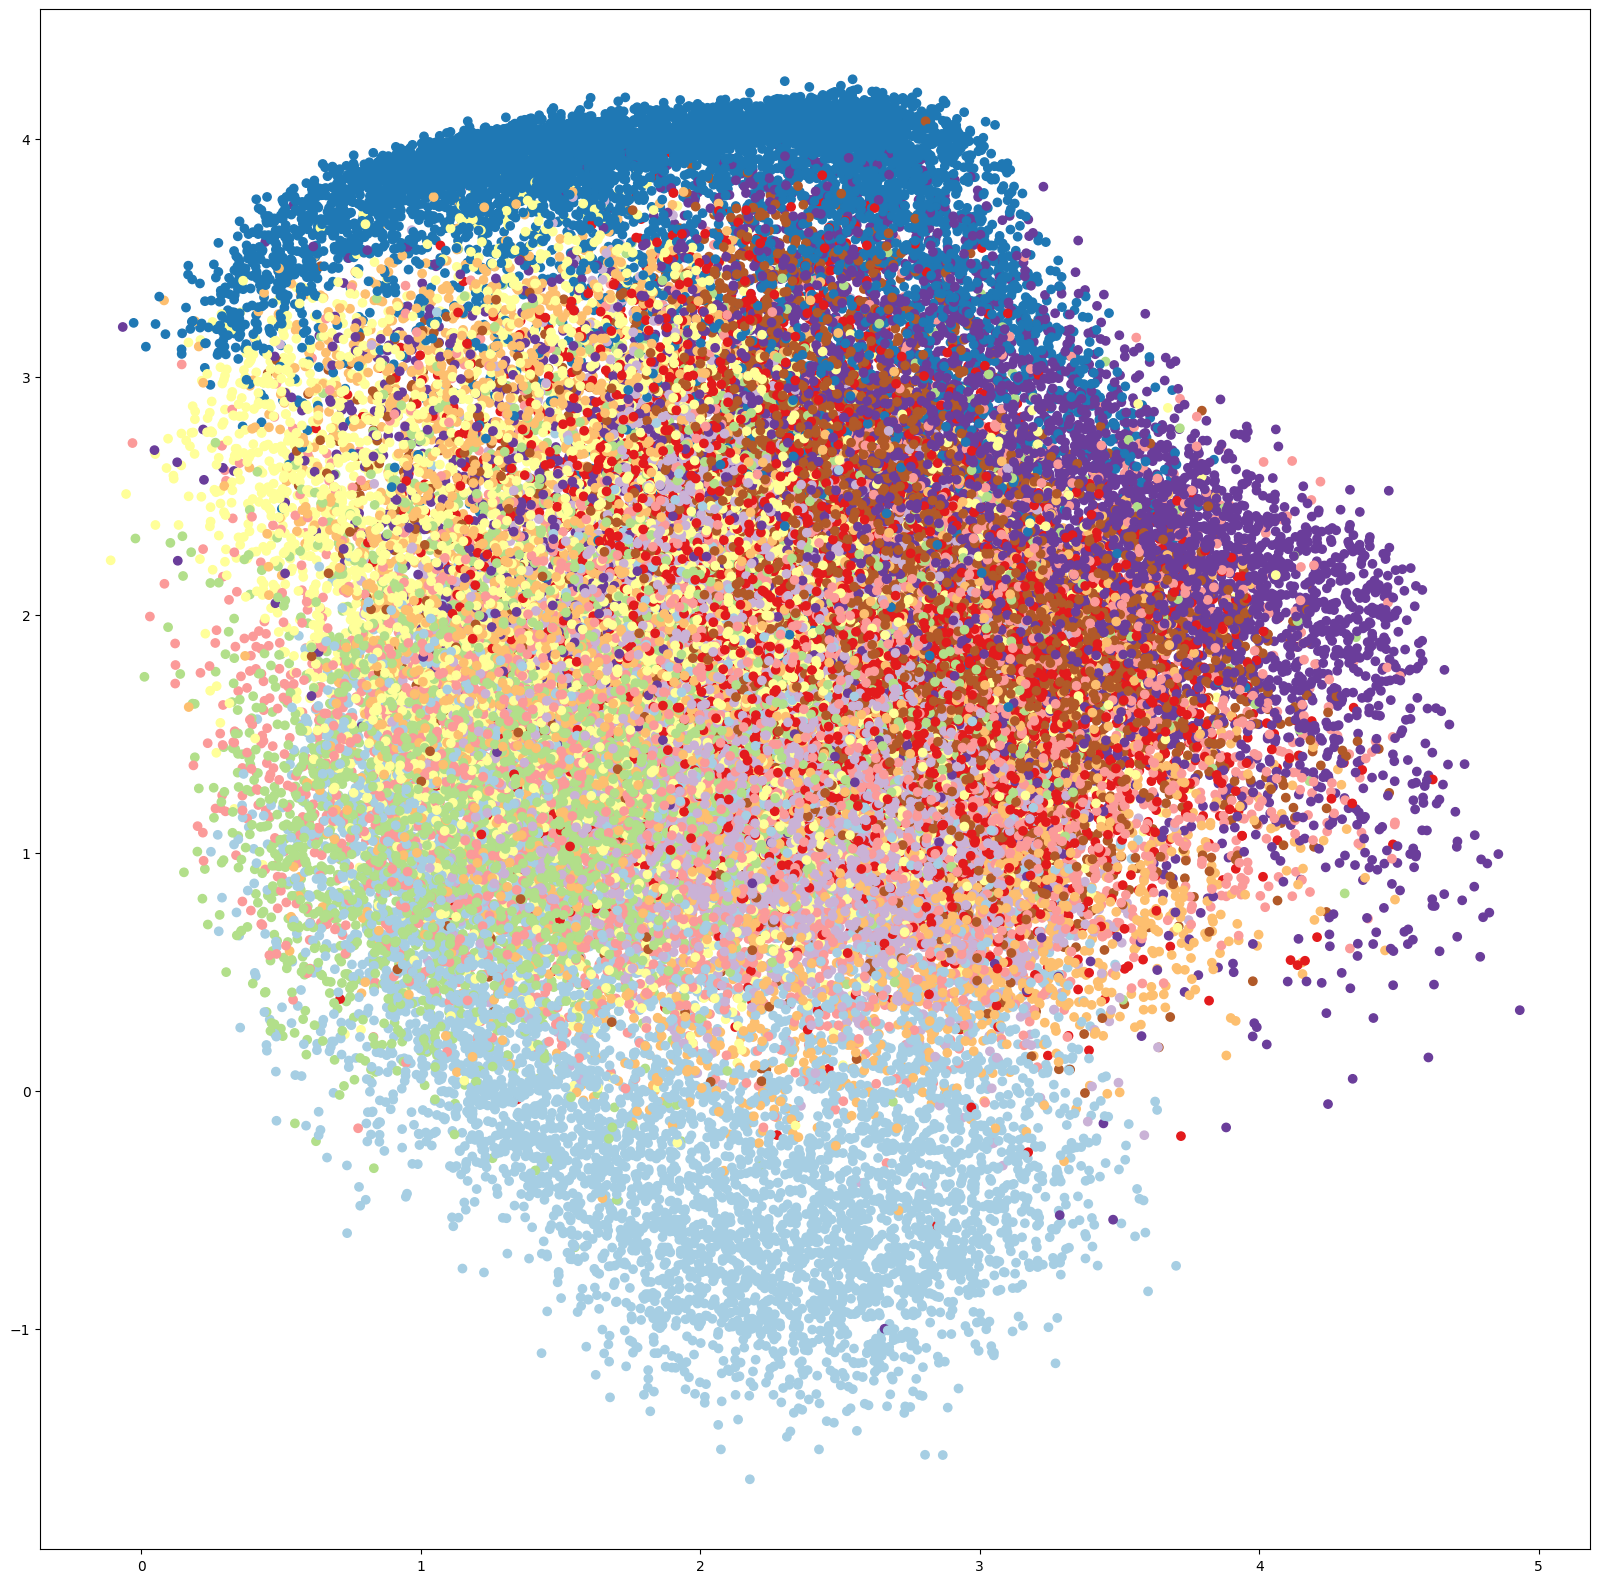

In [23]:
# plot the distribution of samples using the codes learned using the auto-encoder
# Each color represents a number
plt.figure(figsize=(20, 20))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_train, cmap = plt.cm.Paired)

In [24]:
# a function that plots some reconstructed numbers based on 
# an interval of values on x and y
# model: this is the encoder model
# nx: this is the number of values we chose over x
# ny: this is the number of values we chose over y
# interval: a tuple (min_x, min_y, max_x,max_y)
def draw_generated_images(model, nx, ny, interval):
    min_x, min_y, max_x, max_y = interval
    # generate a vector x of nx elements which the values are between min_x and max_x
    grid_x = np.linspace(min_x, max_x, nx) 
    # generate a vector y of ny elements which the values are between min_y and max_y
    grid_y = np.linspace(min_y, max_y, ny)
    
    # generate some codes by combining all values of x and y
    codes = np.array(np.meshgrid(grid_x, grid_y)).T.reshape(-1, 2)
    # predict the image based on the codes 
    decoded_imgs = model.predict(codes)

    plt.figure(figsize=(20, 4))
    for xi in range(nx):
        for yi in range(ny): 
            i = yi * nx + xi
            #print(i)
            ax = plt.subplot(ny, nx, i + 1)
            plt.imshow(decoded_imgs[i].reshape(28, 28))
            plt.gray()
            #plt.title(str(codes[i]))
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()
    
print('function defined')

function defined


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


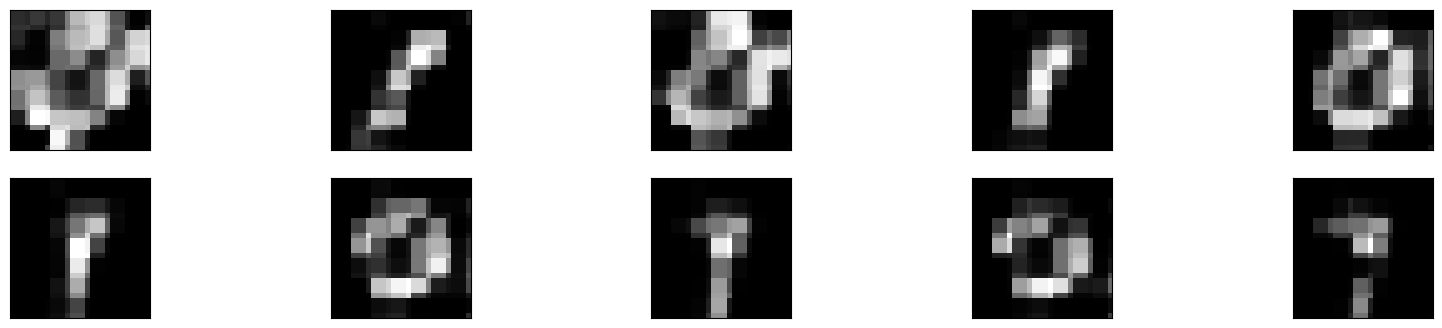

In [25]:
# plot the generated images
draw_generated_images(decoder_cnnae, 5, 2, (encoded_imgs[:, 0].min(), encoded_imgs[:, 1].min(), encoded_imgs[:, 0].max(), encoded_imgs[:, 1].max()))

## IV. CNN denoising auto-encoder

this is taken from : https://blog.keras.io/building-autoencoders-in-keras.html

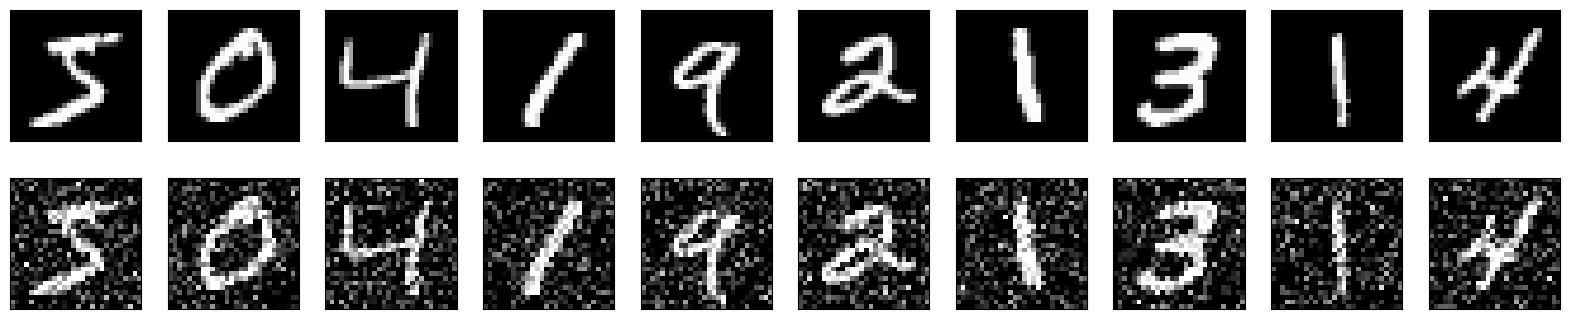

In [26]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
# This architecture is too heavy
# input_img = Input(shape=(28, 28, 1))

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPool2D((2, 2), padding='same')(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPool2D((2, 2), padding='same')(x)

# # At this point the representation is (7, 7, 32)

# x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# denoising_ae = keras.Model(input_img, decoded)

# denoising_ae.summary()

In [28]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(10, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(10, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

denoising_ae = keras.Model(input_img, decoded)

denoising_ae.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 2)      │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 2)        │            38 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 2)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 10)     │           190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601 (2.35 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# we can train it on a problem of regression
denoising_ae.compile(optimizer='adam', loss='mean_squared_error')

denoising_ae.fit(x_train, x_train, epochs=10) 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0641
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0171
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0150
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0142
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0138
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0136
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0134
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0133
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0132
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0132


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


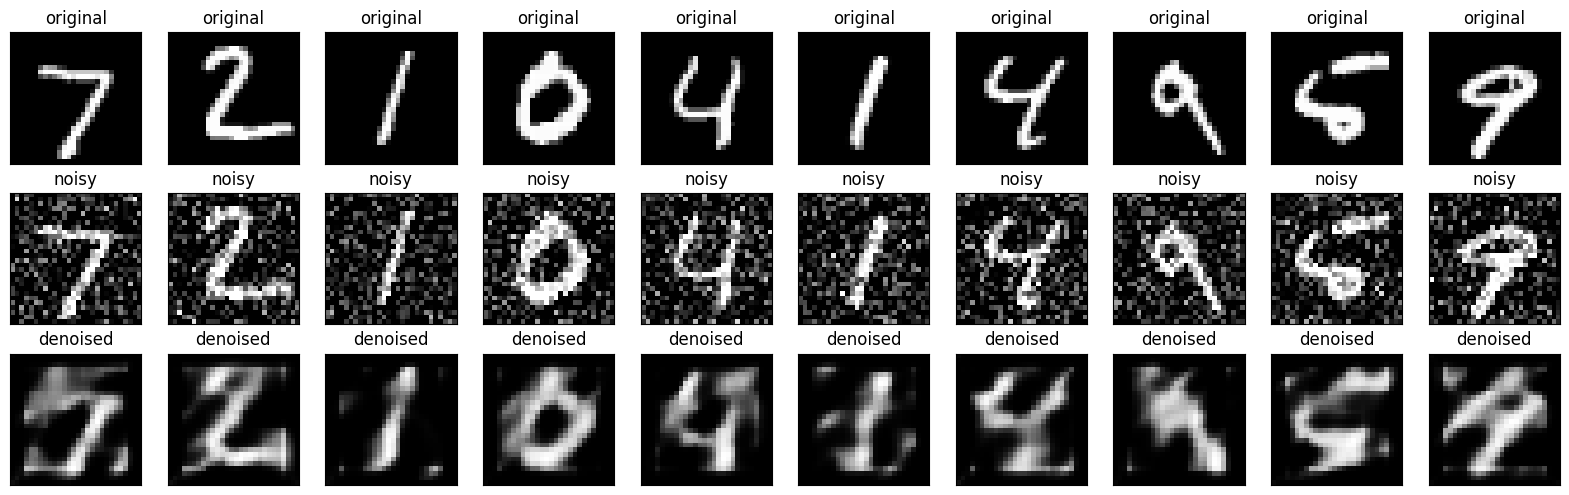

In [30]:
n = 10  # how many digits we will display
x_denoised = denoising_ae.predict(x_test_noisy[:n, :])
plt.figure(figsize=(20, 8))
for i in range(n):
    # original
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("original")
    
    # noisy
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("noisy")

    # denoised
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(x_denoised[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("denoised")
    
plt.show()